In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


Ejercicio 1: Cargar los datos

In [3]:
data_url = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto10/FallecidosEtario.csv"
df = pd.read_csv(data_url)

Ejercicio 2: Inspeccionar los datos

In [35]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Columns: 1179 entries, Grupo de edad to 2023-06-30
dtypes: int64(1178), object(1)
memory usage: 64.6+ KB


Ejercicio 3: Manejar valores faltantes

In [9]:
valores_faltantes = df.isnull().sum()
valores_faltantes
df_limpio = df.dropna()
df_limpio.head()

,Grupo de edad,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,...,2023-06-21,2023-06-22,2023-06-23,2023-06-24,2023-06-25,2023-06-26,2023-06-27,2023-06-28,2023-06-29,2023-06-30
0,<=39,2,2,3,3,3,3,3,3,4,...,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331
1,40-49,1,2,2,2,2,2,2,2,2,...,1946,1947,1947,1947,1947,1947,1947,1947,1947,1947
2,50-59,1,2,2,3,3,5,5,6,8,...,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075
3,60-69,9,10,12,12,12,12,12,14,16,...,9670,9672,9672,9672,9672,9672,9672,9672,9672,9672
4,70-79,21,22,24,28,29,30,31,32,36,...,13955,13956,13958,13958,13958,13958,13958,13958,13958,13958


Ejercicio 4: Convertir tipos de datos

In [16]:
df_limpio['2020-04-09'] = pd.to_datetime(df_limpio['2020-04-09'])
df_limpio

,Grupo de edad,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,...,2023-06-21,2023-06-22,2023-06-23,2023-06-24,2023-06-25,2023-06-26,2023-06-27,2023-06-28,2023-06-29,2023-06-30
0,<=39,1970-01-01 00:00:00.000000002,2,3,3,3,3,3,3,4,...,1331,1331,1331,1331,1331,1331,1331,1331,1331,1331
1,40-49,1970-01-01 00:00:00.000000001,2,2,2,2,2,2,2,2,...,1946,1947,1947,1947,1947,1947,1947,1947,1947,1947
2,50-59,1970-01-01 00:00:00.000000001,2,2,3,3,5,5,6,8,...,5075,5075,5075,5075,5075,5075,5075,5075,5075,5075
3,60-69,1970-01-01 00:00:00.000000009,10,12,12,12,12,12,14,16,...,9670,9672,9672,9672,9672,9672,9672,9672,9672,9672
4,70-79,1970-01-01 00:00:00.000000021,22,24,28,29,30,31,32,36,...,13955,13956,13958,13958,13958,13958,13958,13958,13958,13958
5,80-89,1970-01-01 00:00:00.000000019,21,24,25,26,32,33,38,40,...,14279,14279,14279,14281,14281,14281,14283,14283,14283,14284
6,>=90,1970-01-01 00:00:00.000000004,6,6,7,7,8,8,10,10,...,6406,6406,6406,6406,6406,6406,6405,6406,6406,6406


Ejercicio 5: Calcular estadísticas básicas

In [18]:
valor_medio = df_limpio['2020-04-10'].mean()
valor_medio

9.285714285714286

Ejercicio 6: Crear un histograma

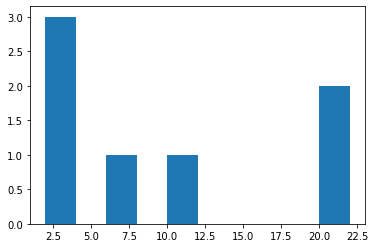

In [20]:
plt.hist(df_limpio['2020-04-10'])
plt.show()

Ejercicio 7: Calcular correlaciones

In [22]:
correlacion = df_limpio['2020-04-10'].corr(df_limpio['2020-04-11'])
correlacion

0.9978879734236782

Ejercicio 8: Dibujar datos de series temporales

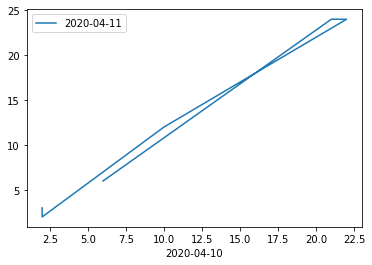

In [24]:
df_limpio.plot(x='2020-04-10', y='2020-04-11')
plt.show()

Ejercicio 9: Descomponer la serie temporal

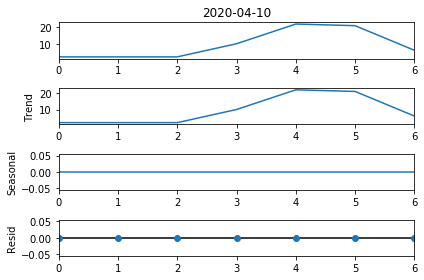

In [27]:
descomposicion = seasonal_decompose(df_limpio['2020-04-10'], model='additive', period=1)
descomposicion.plot()
plt.show()

Ejercicio 10: Crear modelo ARIMA

In [39]:
df['2020-04-10'] = df['2020-04-10'].astype('float64')


In [48]:
modelo = ARIMA(df['2020-04-10'], order=(1, 1, 1))
modelo_ajustado = modelo.fit()
modelo_ajustado.summary()

/Users/eduardogodoy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/eduardogodoy/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             2020-04-10   No. Observations:                    7
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -19.716
Date:                Mon, 10 Jul 2023   AIC                             45.432
Time:                        18:54:18   BIC                             44.807
Sample:                             0   HQIC                            42.931
                                  - 7                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3197      0.748      0.428      0.669      -1.146       1.786
ma.L1          0.9999   3927.168      0.000      1.000   -7696.107    7698.107
sigma2        27.4241   1.08e+05      0.000      1.000   -2.11e+05    2.11e+05
===================================================================================
Ljung-Box (Q):                        5.06   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.41   Prob(JB):                         0.80
Heteroskedasticity (H):     23274944051.81   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         1.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

En general, basándonos en los resultados proporcionados, se sugiere que el modelo ARIMA podría no ser el mejor ajuste para los datos. Los coeficientes no son estadísticamente significativos y hay presencia de heterocedasticidad en los residuos. Sería recomendable realizar un análisis más detallado y evaluar otras opciones de modelos para encontrar un mejor ajuste a los datos.